# Spam Mail Prediction using Machine Learning

This project builds a machine learning model to classify emails as **Spam** or **Ham** using Python.

## Tools & Techniques
- **Libraries:** pandas, scikit-learn, matplotlib
- **Algorithms:** Naive Bayes, Logistic Regression
- **Steps:** Text preprocessing, vectorization, model training, evaluation

## Dataset
Labeled emails with categories:
- **Spam:** Unwanted messages
- **Ham:** Legitimate messages

## Goals
- Analyze email data
- Train a classifier
- Evaluate performance

In [66]:
# Importing the depedencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import re
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Loading the dataset:

data = pd.read_csv('mail_data.csv')

print(data)


     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [68]:
# Replace the null values with a null string

New_data = data.where((pd.notnull(data)),'')
print(New_data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [69]:
print(New_data.shape)
print('-'*100)
print(New_data.info())
print('-'*100)
print(New_data['Category'].value_counts())

(5572, 2)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
----------------------------------------------------------------------------------------------------
Category
ham     4825
spam     747
Name: count, dtype: int64


In [70]:
# Label Encoding:

New_data.loc[New_data['Category'] == 'spam', 'Category',] = 0
New_data.loc[New_data['Category'] == 'ham', 'Category',] = 1


In [71]:
# Separating the data as texts and labels:

X = New_data['Message']
Y = New_data['Category']
print(X)
print('-'*100)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
----------------------------------------------------------------------------------------------------
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [72]:
# Splitting the data into training data and test data:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


In [73]:
# Feature Extraction:
# Transform the text data to feature vectors that can be used as input to the Logistic Regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

print(X_train_features)
print('-'*100)
print(X_test_features)

  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24920025316220423
  (4455, 3922)	0.31287563163368587
  (4455, 6916)	0.19636985317119715
  (4455, 4715)	0.30714144758811196
  (

In [74]:
# Example to find the word at index 2329
feature_names = feature_extraction.get_feature_names_out()
print(feature_names[2329])

don


In [75]:
# Converting Y_train and Y_test values as integers:

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Accuracy of Logistic Regression on training data : 96.77%
Accuracy of Logistic Regression on test data : 96.68%
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



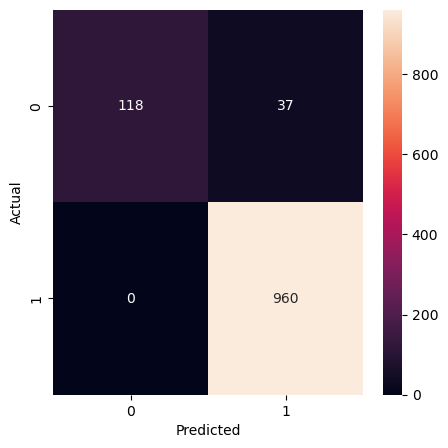

In [76]:
# Training the model:

# Logistic Regression:

model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data:
pred_train = model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train, pred_train)
print(f'Accuracy of Logistic Regression on training data : {accuracy_train*100:.2f}%')

# Prediction on test data:
pred_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, pred_test)
print(f"Accuracy of Logistic Regression on test data : {accuracy_test*100:.2f}%")

# Classification Report:
print(classification_report(Y_test, pred_test))

# Confusion Matrix:

cm = confusion_matrix(Y_test, pred_test)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
# Building a Predictive System:

input_mail = ["Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize."]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Make prediction
pred = model.predict(input_data_features)
print(pred)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

# Building a Predictive System for another input:

input_mail1 = ["Hello, How are you doing today? I hope you're having a great day!"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail1)

# Make prediction
pred = model.predict(input_data_features)
print(pred)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

# Building a Predictive System for another input 3:

input_mail2 = [
    "Congratulations! You've been selected for a free prize. Click the link to claim now."
]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail2)

# Make prediction
pred = model.predict(input_data_features)
print(pred)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail
[1]
Ham Mail
[0]
Spam Mail


Accuracy of Naive Bayes on training data : 98.07%
Accuracy of Naive Bayes on test data : 97.31%
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



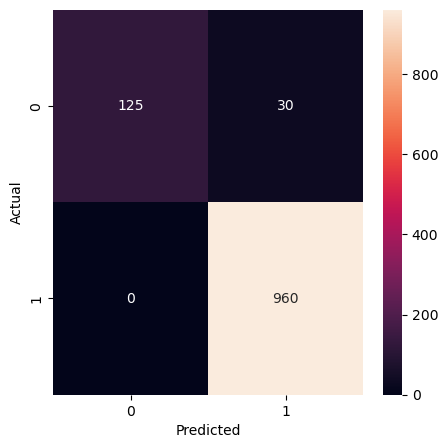

In [78]:
# Naive Bayes:

model2 = MultinomialNB()
model2.fit(X_train_features, Y_train)

# Prediction on training data:
pred1 = model2.predict(X_train_features)
accuracy1 = accuracy_score(Y_train, pred1)
print(f'Accuracy of Naive Bayes on training data : {accuracy1*100:.2f}%') 


# Prediction on test data:
pred2 = model2.predict(X_test_features)
accuracy2 = accuracy_score(Y_test, pred2)
print(f'Accuracy of Naive Bayes on test data : {accuracy2*100:.2f}%')

# Classification Report:
print(classification_report(Y_test, pred2))

# Confusion Matrix:
cm2 = confusion_matrix(Y_test, pred2)
plt.figure(figsize = (5,5))
sns.heatmap(cm2, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy of Random Forest on training data : 100.00%
Accuracy of Random Forest on test data : 97.58%
              precision    recall  f1-score   support

           0       1.00      0.83      0.90       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.97      1115



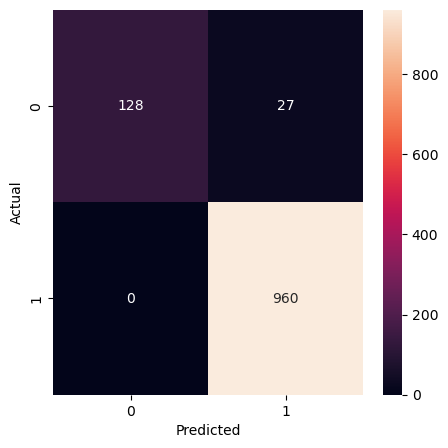

In [79]:
# Random Forest Classifier:

model3 = RandomForestClassifier()
model3.fit(X_train_features, Y_train)

# Prediction on training data:
pred1 = model3.predict(X_train_features)
accuracy1 = accuracy_score(Y_train, pred1)
print(f"Accuracy of Random Forest on training data : {accuracy1*100:.2f}%")


# Prediction on test data:
pred2 = model3.predict(X_test_features)
accuracy2 = accuracy_score(Y_test, pred2)
print(f"Accuracy of Random Forest on test data : {accuracy2*100:.2f}%")

# Classification Report:
print(classification_report(Y_test, pred2))

# Confusion Matrix:
cm2 = confusion_matrix(Y_test, pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy of Decision Tree on training data : 100.00%
Accuracy of Decision Tree on test data : 96.59%
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.96      1115



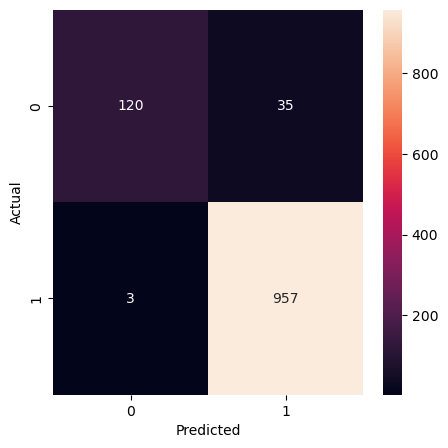

In [80]:
# Decision Tree Classifier:

model4 = DecisionTreeClassifier()
model4.fit(X_train_features, Y_train)

# Prediction on training data:
pred1 = model4.predict(X_train_features)
accuracy1 = accuracy_score(Y_train, pred1)
print(f"Accuracy of Decision Tree on training data : {accuracy1*100:.2f}%")


# Prediction on test data:
pred2 = model4.predict(X_test_features)
accuracy2 = accuracy_score(Y_test, pred2)
print(f"Accuracy of Decision Tree on test data : {accuracy2*100:.2f}%")

# Classification Report:
print(classification_report(Y_test, pred2))

# Confusion Matrix:
cm2 = confusion_matrix(Y_test, pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy of SVM on training data : 99.53%
Accuracy of SVM on test data : 98.21%
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



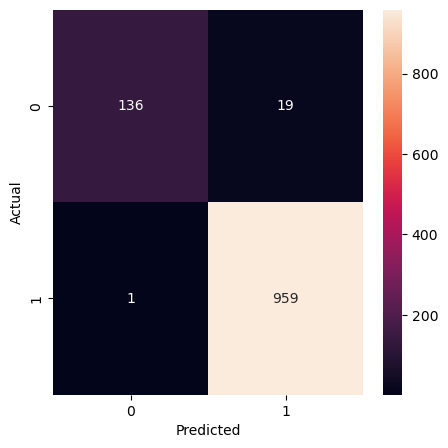

In [81]:
# Support Vector Machine:

model5 = SVC(kernel= 'linear')
model5.fit(X_train_features, Y_train)

# Prediction on training data:
pred1 = model5.predict(X_train_features)
accuracy1 = accuracy_score(Y_train, pred1)
print(f"Accuracy of SVM on training data : {accuracy1*100:.2f}%")

# Prediction on test data:
pred2 = model5.predict(X_test_features) 
accuracy2 = accuracy_score(Y_test, pred2)
print(f"Accuracy of SVM on test data : {accuracy2*100:.2f}%")

# Classification Report:
print(classification_report(Y_test, pred2))

# Confusion Matrix:
cm2 = confusion_matrix(Y_test, pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#                                                                           **End of code**